In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [3]:
#Reading the csv file into a dataframe
df = pd.read_csv('/Users/sahasraiyer/UCSD Course 1/Week 5/Indicators.csv')
df.shape

(5656458, 6)

In [424]:
df.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [44]:
#Checking if there are any null values in the dataframe
df.isnull().any()

CountryName      False
CountryCode      False
IndicatorName    False
IndicatorCode    False
Year             False
Value            False
dtype: bool

In [45]:
#Computing basic statistical information for the dataset
df.describe()

,Year,Value
count,5.656458e+06,5.656458e+06
mean,1.994464e+03,1.070501e+12
std,1.387895e+01,4.842469e+13
min,1.960000e+03,-9.824821e+15
25%,1.984000e+03,5.566242e+00
50%,1.997000e+03,6.357450e+01
75%,2.006000e+03,1.346722e+07
max,2.015000e+03,1.103367e+16


In [46]:
#Life expectancy for all countries, for female, male and total population
life_expectancy_f = df[df['IndicatorName'] == "Life expectancy at birth, female (years)"]
life_expectancy_m = df[df['IndicatorName'] == "Life expectancy at birth, male (years)"]
life_expectancy_total = df[df['IndicatorName'] == "Life expectancy at birth, total (years)"]

In [47]:
life_expectancy_f.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
20,Arab World,ARB,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1960,47.883246
101,Caribbean small states,CSS,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1960,64.307102
186,Central Europe and the Baltics,CEB,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1960,70.367730
280,East Asia & Pacific (all income levels),EAS,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1960,50.112757
398,East Asia & Pacific (developing only),EAP,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1960,47.359607


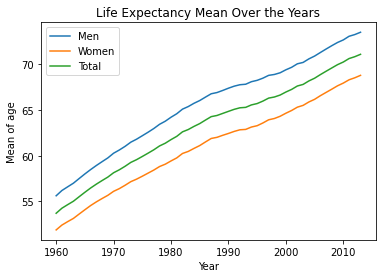

In [48]:
#Line graph depicting trend for all three groups over the years
life_expectancy_f.groupby('Year')['Value'].mean().plot(label="Men")
life_expectancy_m.groupby('Year')['Value'].mean().plot(label="Women")
life_expectancy_total.groupby('Year')['Value'].mean().plot(label="Total")
plt.xlabel("Year")
plt.ylabel("Mean of age")
plt.title("Life Expectancy Mean Over the Years")
plt.legend()
plt.show()

In [58]:
#Mortality rate for all countries, for female, male and total population
mortality_rate_f = df[df['IndicatorName'] == "Mortality rate, adult, female (per 1,000 female adults)"]
mortality_rate_m = df[df['IndicatorName'] == "Mortality rate, adult, male (per 1,000 male adults)"]
mortality_rate_total = df[df['IndicatorName'] == "Mortality rate, infant (per 1,000 live births)"]
mortality_rate_f.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
50,Arab World,ARB,"Mortality rate, adult, female (per 1,000 femal...",SP.DYN.AMRT.FE,1960,298.935703
131,Caribbean small states,CSS,"Mortality rate, adult, female (per 1,000 femal...",SP.DYN.AMRT.FE,1960,201.475579
211,Central Europe and the Baltics,CEB,"Mortality rate, adult, female (per 1,000 femal...",SP.DYN.AMRT.FE,1960,124.749727
310,East Asia & Pacific (all income levels),EAS,"Mortality rate, adult, female (per 1,000 femal...",SP.DYN.AMRT.FE,1960,326.366329
430,East Asia & Pacific (developing only),EAP,"Mortality rate, adult, female (per 1,000 femal...",SP.DYN.AMRT.FE,1960,353.252556


Text(0.5, 1.0, 'Mortality Mean Over the Years')

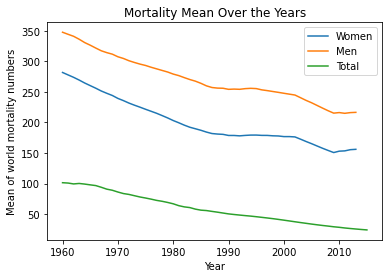

In [59]:
#Line graph depicting trend for all three groups over the years
mortality_rate_f.groupby('Year')['Value'].mean().plot(label="Women")
mortality_rate_m.groupby('Year')['Value'].mean().plot(label="Men")
mortality_rate_total.groupby('Year')['Value'].mean().plot(label="Total")
plt.xlabel("Year")
plt.ylabel("Mean of world mortality numbers")
plt.legend()
plt.title("Mortality Mean Over the Years")

#### Mortality rate is a measure of the frequency of occurrence of death in a defined population during a specified interval.


#### Life expectancy and mortality rate agree with each other. 

In [60]:
#Checking for the Pearson's Coe-fficient between mortality rate and life expectancy
mortality_and_life_expectancy = life_expectancy_total.merge(mortality_rate_total, on = ['CountryCode','Year'], how = "inner")


In [61]:
mortality_and_life_expectancy.head()

,CountryName_x,CountryCode,IndicatorName_x,IndicatorCode_x,Year,Value_x,CountryName_y,IndicatorName_y,IndicatorCode_y,Value_y
0,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,46.847059,Arab World,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,159.950234
1,Caribbean small states,CSS,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,62.271795,Caribbean small states,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,62.071399
2,Euro area,EMU,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,69.273711,Euro area,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,38.868046
3,European Union,EUU,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,69.279544,European Union,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,38.252879
4,High income,HIC,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,67.991498,High income,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,37.000000


In [62]:
mortality_and_life_expectancy=mortality_and_life_expectancy.drop(['IndicatorCode_x','CountryName_y','IndicatorCode_y'], axis=1)

In [63]:
mapping = {'CountryName_x': 'CountryName','IndicatorName_x':'IndicatorName_Life_Expectancy',
          'IndicatorName_y':'IndicatorName_Mortality_Rate','Value_x' : 'Life_Expectancy_Value','Value_y':'Mortality_Rate_Value'}

mortality_and_life_expectancy.rename(columns=mapping, inplace=True)

In [64]:
mortality_and_life_expectancy.head()

,CountryName,CountryCode,IndicatorName_Life_Expectancy,Year,Life_Expectancy_Value,IndicatorName_Mortality_Rate,Mortality_Rate_Value
0,Arab World,ARB,"Life expectancy at birth, total (years)",1960,46.847059,"Mortality rate, infant (per 1,000 live births)",159.950234
1,Caribbean small states,CSS,"Life expectancy at birth, total (years)",1960,62.271795,"Mortality rate, infant (per 1,000 live births)",62.071399
2,Euro area,EMU,"Life expectancy at birth, total (years)",1960,69.273711,"Mortality rate, infant (per 1,000 live births)",38.868046
3,European Union,EUU,"Life expectancy at birth, total (years)",1960,69.279544,"Mortality rate, infant (per 1,000 live births)",38.252879
4,High income,HIC,"Life expectancy at birth, total (years)",1960,67.991498,"Mortality rate, infant (per 1,000 live births)",37.000000


In [65]:
mortality_and_life_expectancy.corr()

,Year,Life_Expectancy_Value,Mortality_Rate_Value
Year,1.000000,0.405254,-0.467738
Life_Expectancy_Value,0.405254,1.000000,-0.939712
Mortality_Rate_Value,-0.467738,-0.939712,1.000000


#### The high negative value depicts an inverse relationship between the 2 attributes. 

<AxesSubplot:title={'center':'Value'}, xlabel='Year'>

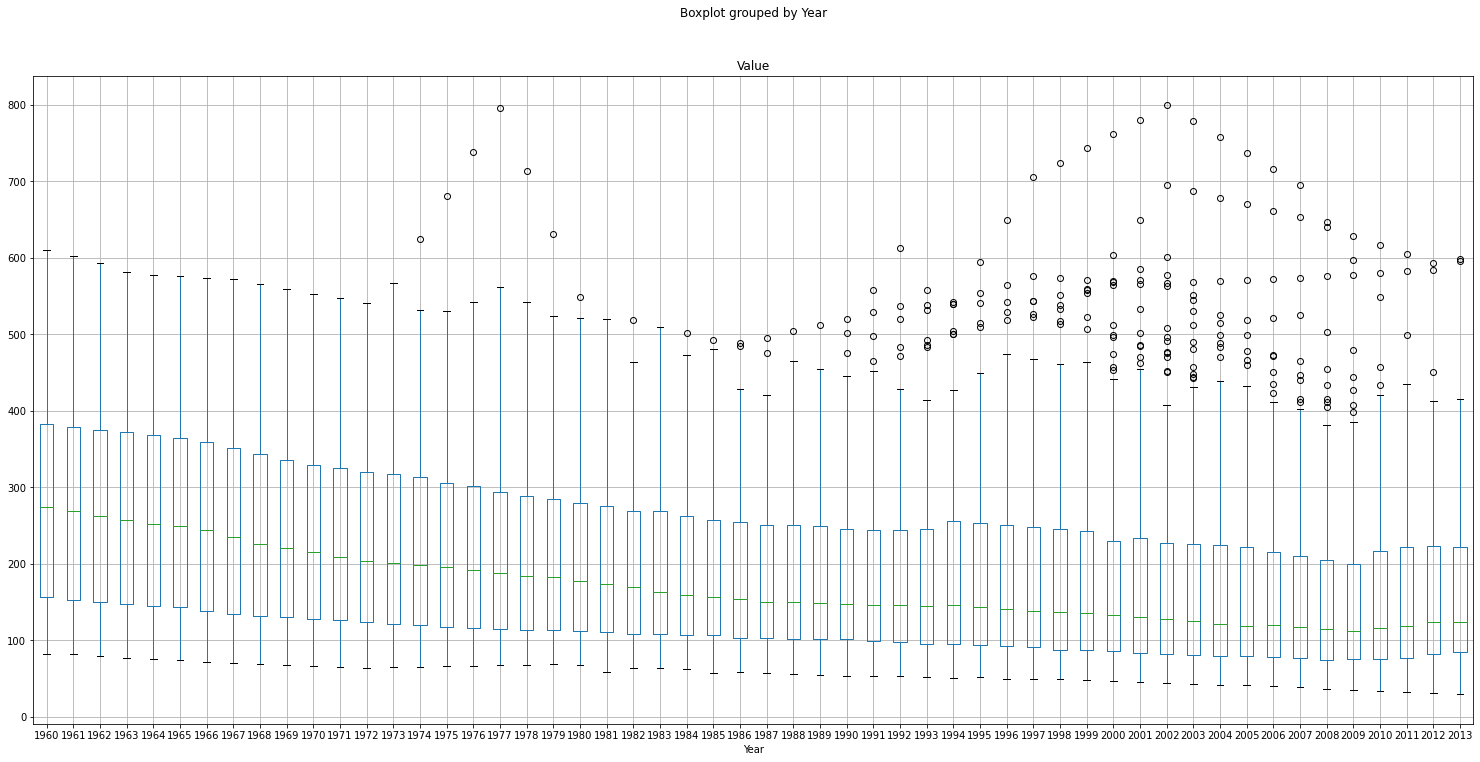

In [66]:
#Boxplot for exploring the range of mortality for all countries, for every year, individually, females
mortality_rate_f.boxplot(column='Value', by ='Year',figsize=(25,12))

<AxesSubplot:title={'center':'Value'}, xlabel='Year'>

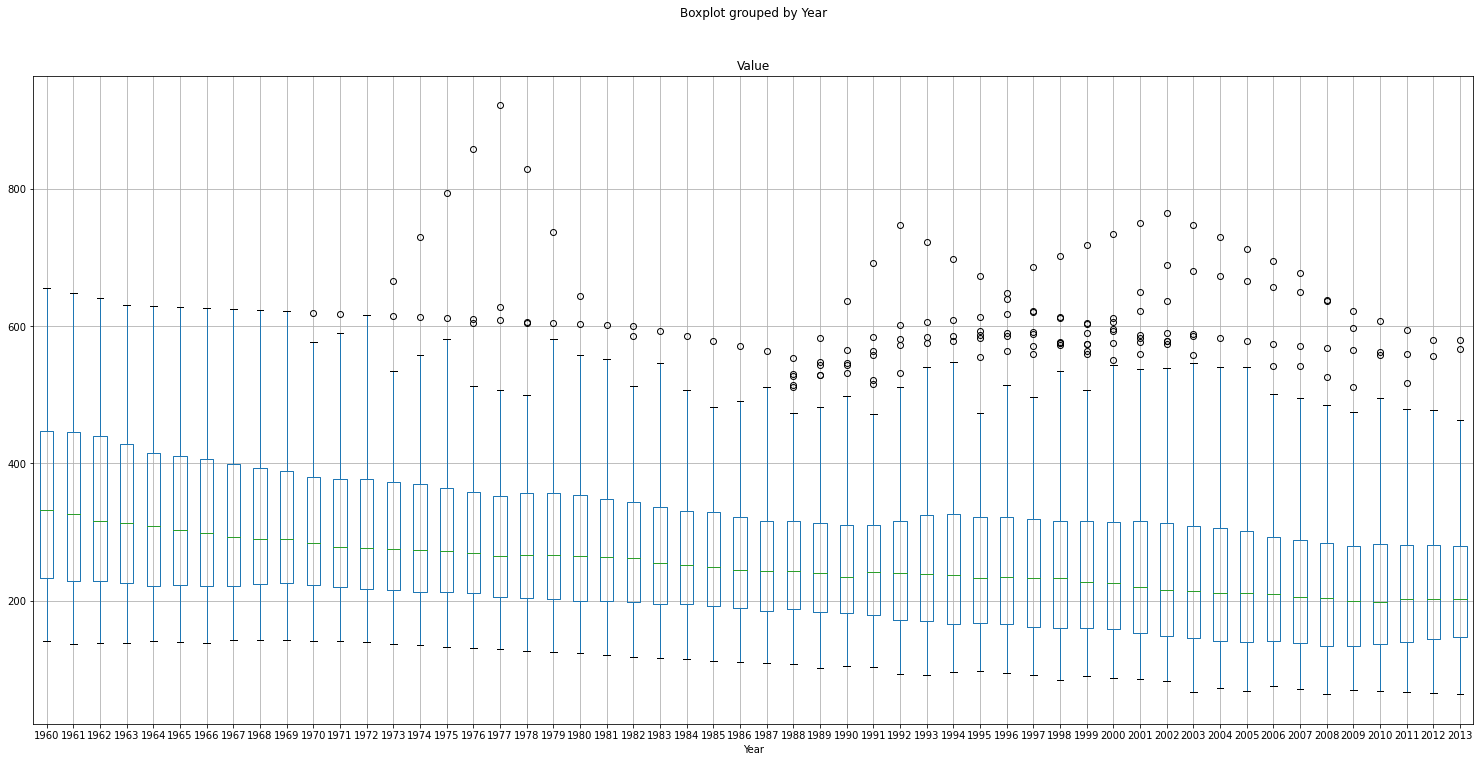

In [67]:
#Boxplot for exploring the range of mortality for all countries, for every year, individually, males
mortality_rate_m.boxplot(column='Value', by ='Year',figsize=(25,12))

<AxesSubplot:title={'center':'Value'}, xlabel='Year'>

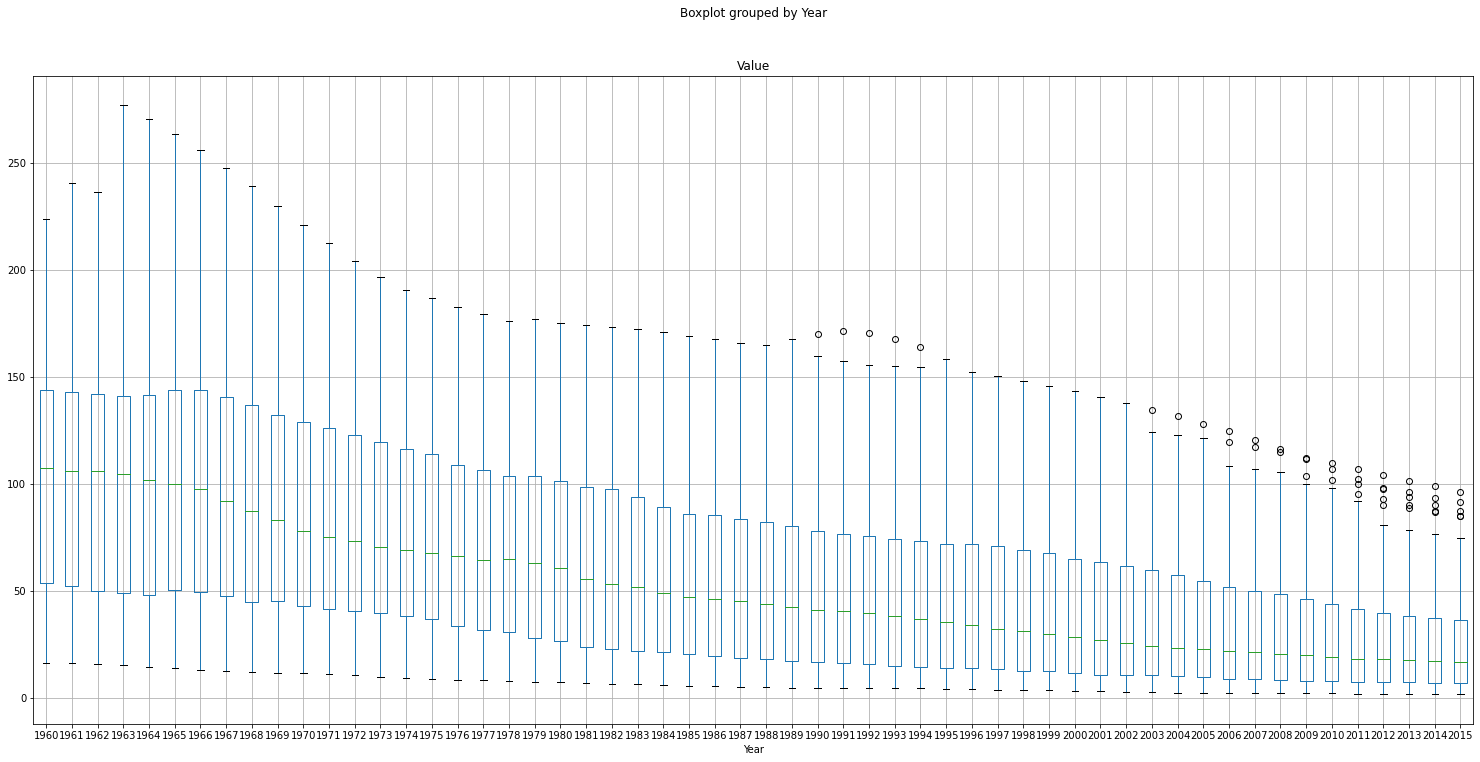

In [68]:
##Boxplot for exploring the range of mortality for all countries, for every year, individually, total population
mortality_rate_total.boxplot(column='Value', by ='Year',figsize=(25,12), vert = True)

In [69]:
#Function to fetch the outliers for all 3 groups, i.e, those that are below Q1-(1.5*IQR) and those above Q3+(1.5*IQR)

df_outliers = pd.DataFrame()
def find_data_outliers(df_bp):
    Q1 = df_bp['Value'].quantile(0.25)
    Q3 = df_bp['Value'].quantile(0.75)
    Q2 = df_bp['Value'].quantile(0.50)
    IQR = Q3 - Q1
    df_outliers = df_bp[(df_bp['Value'] < Q1-(1.5*IQR)) | (df_bp['Value'] > Q3+(1.5*IQR))]
    df_outliers['Min Whisker Value'] = Q1-(1.5*IQR)
    df_outliers['Max Whisker Value'] = Q3+(1.5*IQR)
    df_outliers['Median'] = Q2
    df_outliers['Q1'] = Q1
    df_outliers['Q3'] = Q3
    return df_outliers

In [70]:
#Outliers for total population, grouped by year
mortality_rate_total_outliers = mortality_rate_total.groupby('Year').apply(find_data_outliers)

In [71]:
#Outliers for female population, grouped by year
mortality_rate_f_outliers = mortality_rate_f.groupby('Year').apply(find_data_outliers)

In [72]:
#Outliers for male population, grouped by year
mortality_rate_m_outliers = mortality_rate_m.groupby('Year').apply(find_data_outliers)

<AxesSubplot:title={'center':'Value'}, xlabel='Year'>

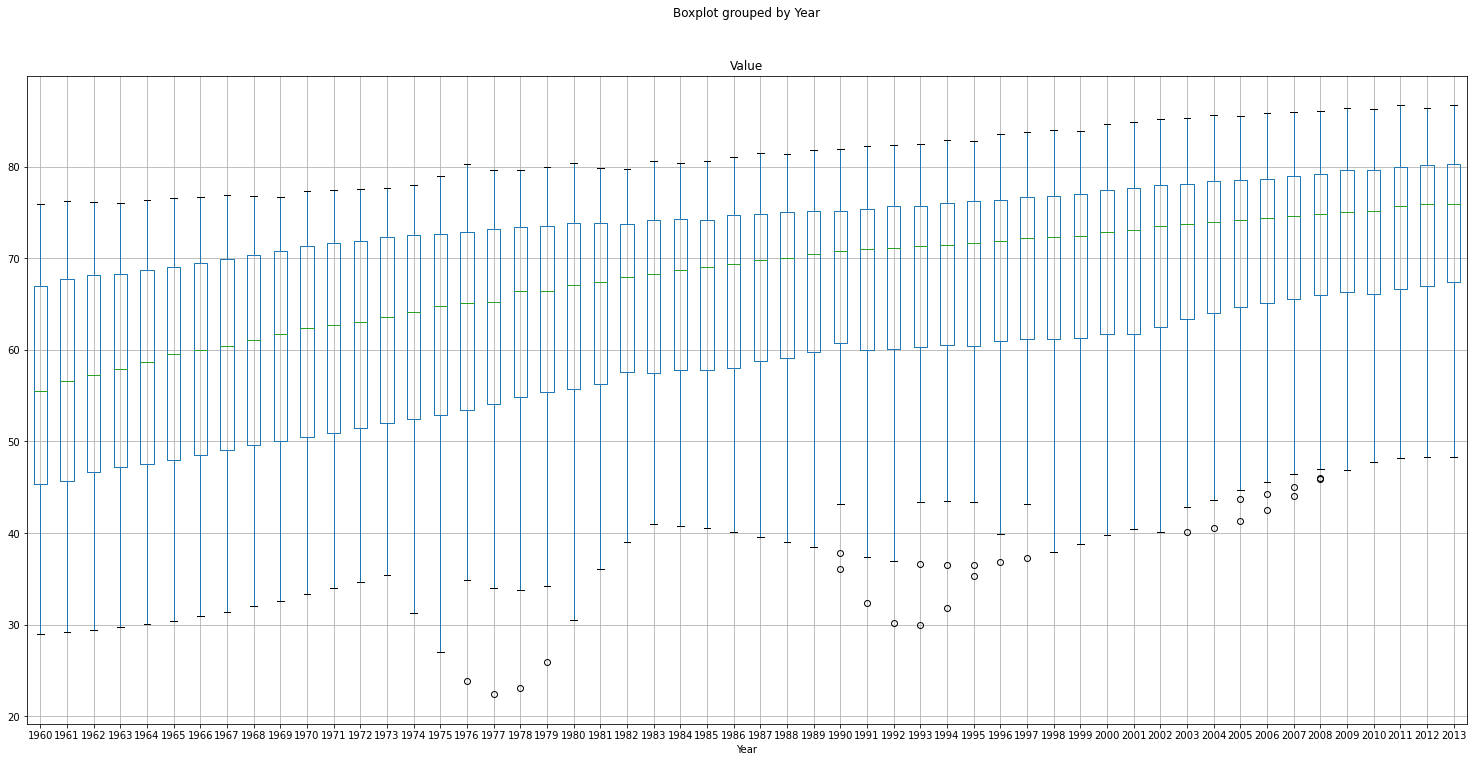

In [73]:
#Boxplot for exploring the range of values for life expectancy for all countries, for every year, individually, females
life_expectancy_f.boxplot(column='Value', by ='Year',figsize=(25,12))

<AxesSubplot:title={'center':'Value'}, xlabel='Year'>

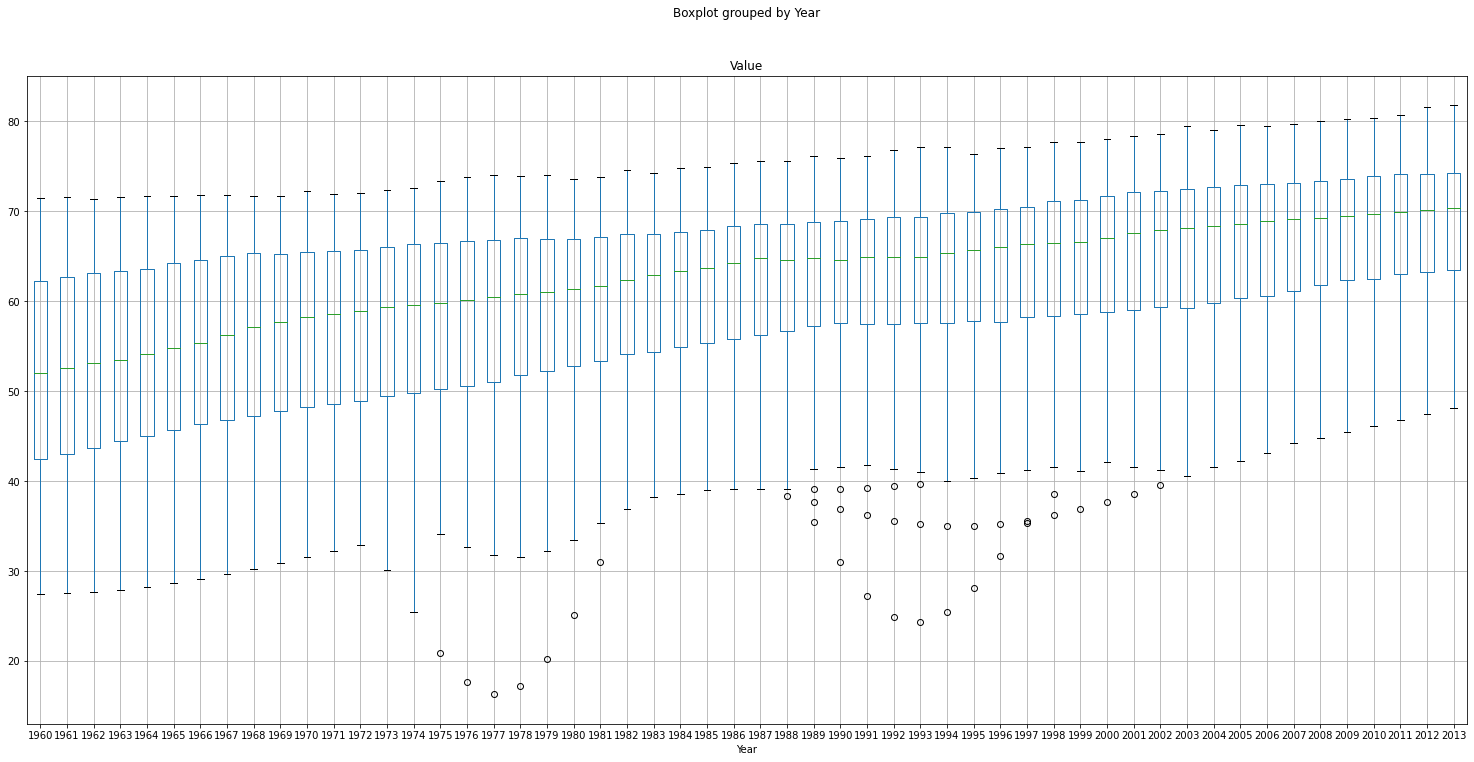

In [74]:
#Boxplot for exploring the range of values for life expectancy for all countries, for every year, individually, males
life_expectancy_m.boxplot(column='Value', by ='Year',figsize=(25,12))

<AxesSubplot:title={'center':'Value'}, xlabel='Year'>

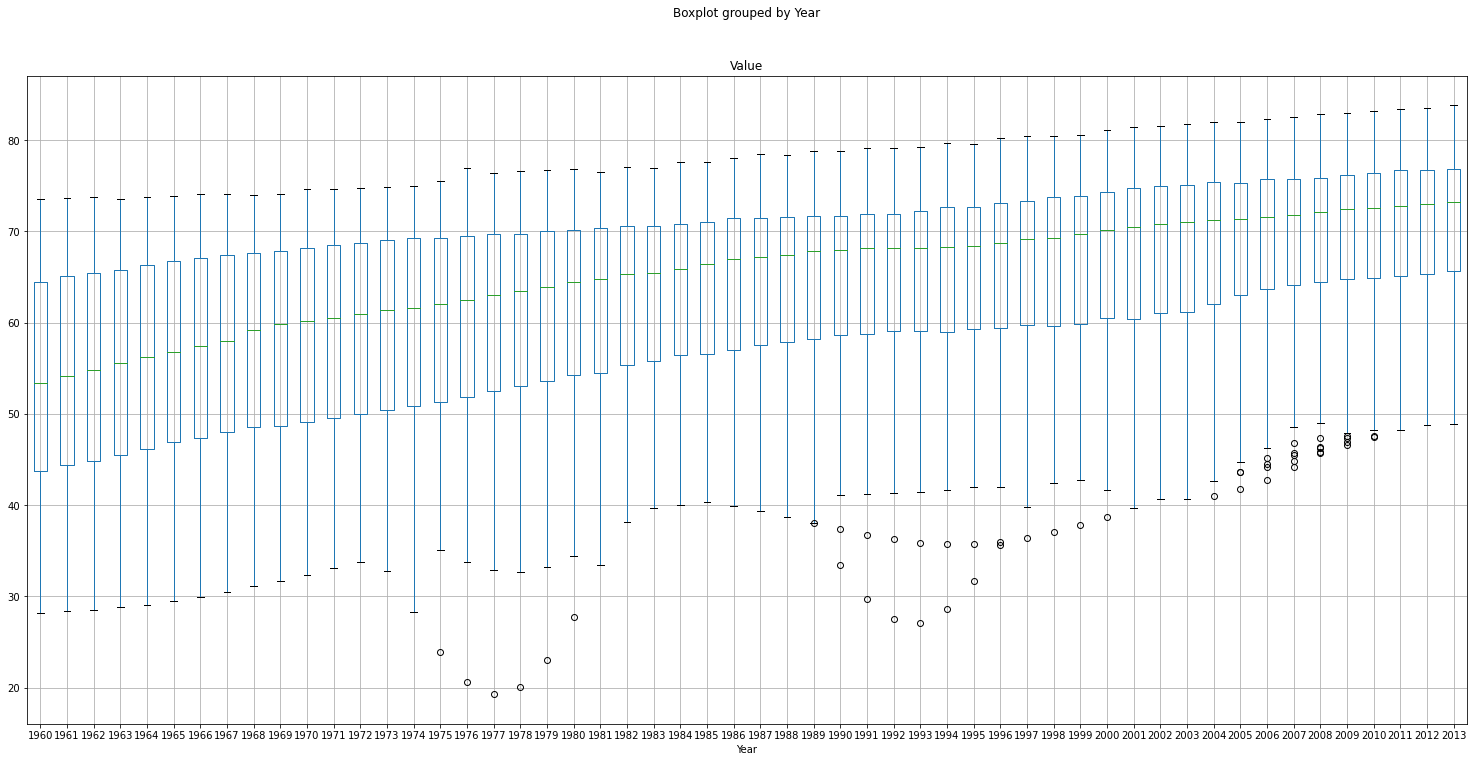

In [75]:
#Boxplot for exploring the range of values for life expectancy for all countries, for every year, individually, total population
life_expectancy_total.boxplot(column='Value', by ='Year',figsize=(25,12))

In [76]:
#Outliers for female population, grouped by year
life_expectancy_f_outliers = life_expectancy_f.groupby('Year').apply(find_data_outliers)

In [77]:
#Outliers for male population, grouped by year
life_expectancy_m_outliers = life_expectancy_m.groupby('Year').apply(find_data_outliers)

In [78]:
#Outliers for total population, grouped by year
life_expectancy_total_outliers = life_expectancy_total.groupby('Year').apply(find_data_outliers)

In [79]:
#Checking unique countries present in the outlier dataframe for total population
life_expectancy_total_outliers['CountryName'].unique()

array(['Cambodia', 'Sierra Leone', 'Rwanda', 'Zimbabwe', 'Lesotho',
       'Central African Republic', 'Swaziland'], dtype=object)

In [80]:
#Checking unique countries present in the outlier dataframe for female population
life_expectancy_f_outliers['CountryName'].unique()

array(['Cambodia', 'Rwanda', 'Sierra Leone', 'Zimbabwe', 'Lesotho'],
      dtype=object)

In [81]:
#Checking unique countries present in the outlier dataframe for male population
life_expectancy_m_outliers['CountryName'].unique()

array(['Cambodia', 'Sierra Leone', 'Angola', 'Rwanda'], dtype=object)

In [82]:
#Checking unique countries present in the outlier dataframe for total population
mortality_rate_total_outliers['CountryName'].unique()

array(['Liberia', 'Sierra Leone', 'Angola', 'Central African Republic',
       'Somalia', 'Chad'], dtype=object)

In [83]:
#Checking unique countries present in the outlier dataframe for female population
mortality_rate_f_outliers['CountryName'].unique()

array(['Cambodia', 'Eritrea', 'Sierra Leone', 'Rwanda', 'Zambia',
       'Uganda', 'Malawi', 'Zimbabwe', 'Botswana', 'Lesotho',
       'Central African Republic', 'Kenya', 'Swaziland', 'Tanzania',
       'South Africa', "Cote d'Ivoire", 'Namibia', 'Mozambique'],
      dtype=object)

In [84]:
#Checking unique countries present in the outlier dataframe for male population
mortality_rate_m_outliers['CountryName'].unique()

array(['Eritrea', 'Cambodia', 'Timor-Leste', 'Iran, Islamic Rep.',
       'Rwanda', 'Sierra Leone', 'Uganda', 'Zambia', 'Malawi', 'Zimbabwe',
       'Botswana', 'Lesotho', 'Swaziland', 'South Africa'], dtype=object)

#### Taking a sample of one of the outlier countries, understanding why the values end up being outliers when stacked against the mean total life expectancy and mortality. 
#### Sierra Leone is present in all the outlier dataframes, hence using this as the sample case

In [85]:
#Filtering the mortality rate for only Sierra Leone, for all years
mortality_rate_sl = mortality_rate_total[mortality_rate_total['CountryName'] == "Sierra Leone"]

Text(0.5, 1.0, 'Mortality Mean Over the Years')

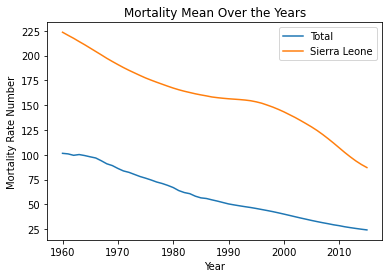

In [86]:
#Plotting mortality rate of Sierra Leone against the mean for all years
mortality_rate_total.groupby('Year')['Value'].mean().plot(label="Total")
mortality_rate_sl.groupby('Year')['Value'].mean().plot(label="Sierra Leone")
plt.xlabel("Year")
plt.ylabel("Mortality Rate Number")
plt.legend()
plt.title("Mortality Mean Over the Years")

In [87]:
#Filtering the life expectancy rate for only Sierra Leone, for all years
life_expectancy_sl = life_expectancy_total[life_expectancy_total['CountryName'] == "Sierra Leone"]

Text(0.5, 1.0, 'Life expectancy Mean Over the Years')

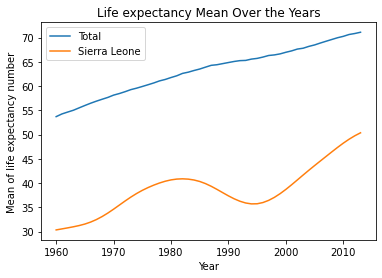

In [88]:
#Plotting life expectancy rate of Sierra Leone against the mean for all years
life_expectancy_total.groupby('Year')['Value'].mean().plot(label="Total")
life_expectancy_sl.groupby('Year')['Value'].mean().plot(label="Sierra Leone")
plt.xlabel("Year")
plt.ylabel("Mean of life expectancy number")
plt.legend()
plt.title("Life expectancy Mean Over the Years")

#### The life expectancy of Sierra Leone, can be observed to not cross 55 years of age. Essentially then, not a high % of the population there, should survive to the age of 65 (Available Indicator in Dataset)

In [89]:
#Checking survival to age 65 for Sierra Leone for male and female population
survival_to_age_65_f_sl = df[(df['IndicatorName'] == "Survival to age 65, female (% of cohort)") & (df['CountryName'] == "Sierra Leone")]
survival_to_age_65_m_sl = df[(df['IndicatorName'] == "Survival to age 65, male (% of cohort)") & (df['CountryName'] == "Sierra Leone")]

Text(0.5, 1.0, 'Survival of Females and Males in Sierra Leone to age 65')

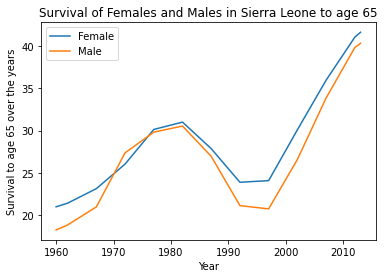

In [90]:
#Plotting this survival number
plt.plot(survival_to_age_65_f_sl['Year'].values, survival_to_age_65_f_sl['Value'].values)
plt.plot(survival_to_age_65_m_sl['Year'].values, survival_to_age_65_m_sl['Value'].values)
plt.xlabel("Year")
plt.ylabel("Survival to age 65 over the years")
plt.legend(["Female","Male"])
plt.title("Survival of Females and Males in Sierra Leone to age 65")

#### The graph peaks at just a tip over 40, which indicates that upto 2014, the population surviving to the age of 65 in Sierra Leone is 0

In [91]:
#Verifying this by checking the count of population over 65
population_ages_65_above_sl = df[(df['IndicatorName'] == "Population ages 65 and above (% of total)") & (df['CountryCode'] == "Sierra Leone")]

In [92]:
population_ages_65_above_sl.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value


#### There exists no outlier to this data. Upto 2014, no one has survived till the age of 65 in Sierra Leone

#### Now checking if the reverse can hold true, i.e, if the population above 65 is rising, then so will life expectancy

In [94]:
#Filtering population above 65 (% of total) indicator data
population_ages_65_above = df[df['IndicatorName'] == "Population ages 65 and above (% of total)"]
population_ages_65_above.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
67,Arab World,ARB,Population ages 65 and above (% of total),SP.POP.65UP.TO.ZS,1960,3.535465
146,Caribbean small states,CSS,Population ages 65 and above (% of total),SP.POP.65UP.TO.ZS,1960,4.141187
216,Central Europe and the Baltics,CEB,Population ages 65 and above (% of total),SP.POP.65UP.TO.ZS,1960,7.207827
336,East Asia & Pacific (all income levels),EAS,Population ages 65 and above (% of total),SP.POP.65UP.TO.ZS,1960,3.878393
457,East Asia & Pacific (developing only),EAP,Population ages 65 and above (% of total),SP.POP.65UP.TO.ZS,1960,3.631579


In [95]:
#Filtering total popoulation, to convert % to number
population_total = df[df['IndicatorName'] == "Population, total"]
population_total.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
73,Arab World,ARB,"Population, total",SP.POP.TOTL,1960,9.249590e+07
150,Caribbean small states,CSS,"Population, total",SP.POP.TOTL,1960,4.190810e+06
221,Central Europe and the Baltics,CEB,"Population, total",SP.POP.TOTL,1960,9.140158e+07
341,East Asia & Pacific (all income levels),EAS,"Population, total",SP.POP.TOTL,1960,1.042475e+09
462,East Asia & Pacific (developing only),EAP,"Population, total",SP.POP.TOTL,1960,8.964930e+08


In [33]:
#Joining both dataframes to get numeric value of population, per country, per year
population_above_65_and_total = population_total.merge(population_ages_65_above, on = ['CountryCode','Year'], how = "inner")

In [34]:
population_above_65_and_total=population_above_65_and_total.drop(['IndicatorCode_x','CountryName_y','IndicatorCode_y'], axis=1)

In [35]:
mapping = {'CountryName_x': 'CountryName','IndicatorName_x':'Population_Total',
          'IndicatorName_y':'Population_65_And_Above','Value_x' : 'Population_Total_Value','Value_y':'Population_65_And_Above_Percentage'}

population_above_65_and_total.rename(columns=mapping, inplace=True)

In [36]:
population_above_65_and_total.head()

,CountryName,CountryCode,Population_Total,Year,Population_Total_Value,Population_65_And_Above,Population_65_And_Above_Percentage
0,Arab World,ARB,"Population, total",1960,9.249590e+07,Population ages 65 and above (% of total),3.535465
1,Caribbean small states,CSS,"Population, total",1960,4.190810e+06,Population ages 65 and above (% of total),4.141187
2,Central Europe and the Baltics,CEB,"Population, total",1960,9.140158e+07,Population ages 65 and above (% of total),7.207827
3,East Asia & Pacific (all income levels),EAS,"Population, total",1960,1.042475e+09,Population ages 65 and above (% of total),3.878393
4,East Asia & Pacific (developing only),EAP,"Population, total",1960,8.964930e+08,Population ages 65 and above (% of total),3.631579


In [97]:
#Adding new column to store population count
population_above_65_and_total['Total_Pop_Above_65'] = population_above_65_and_total['Population_Total_Value']*(population_above_65_and_total['Population_65_And_Above_Percentage']/100)

In [98]:
population_above_65_and_total.head()

,CountryName,CountryCode,Population_Total,Year,Population_Total_Value,Population_65_And_Above,Population_65_And_Above_Percentage,Total_Pop_Above_65
0,Arab World,ARB,"Population, total",1960,9.249590e+07,Population ages 65 and above (% of total),3.535465,3.270160e+06
1,Caribbean small states,CSS,"Population, total",1960,4.190810e+06,Population ages 65 and above (% of total),4.141187,1.735493e+05
2,Central Europe and the Baltics,CEB,"Population, total",1960,9.140158e+07,Population ages 65 and above (% of total),7.207827,6.588068e+06
3,East Asia & Pacific (all income levels),EAS,"Population, total",1960,1.042475e+09,Population ages 65 and above (% of total),3.878393,4.043129e+07
4,East Asia & Pacific (developing only),EAP,"Population, total",1960,8.964930e+08,Population ages 65 and above (% of total),3.631579,3.255685e+07


Text(0.5, 1.0, 'Population over age of 65 sum for all countries')

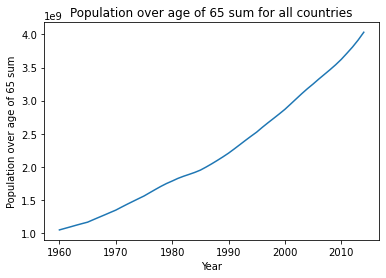

In [99]:
#Plot population over 65 count over the years
plt.plot(population_above_65_and_total.groupby('Year')['Total_Pop_Above_65'].sum())
plt.xlabel("Year")
plt.ylabel("Population over age of 65 sum")

plt.title("Population over age of 65 sum for all countries")

In [100]:
#Checking for the Pearson's Coe-fficient between population over 65 and life expectancy
population_over_65_life_expectancy_total = life_expectancy_total.merge(population_above_65_and_total, on = ['CountryCode','Year'], how = "inner")

In [101]:
population_over_65_life_expectancy_total.head()

,CountryName_x,CountryCode,IndicatorName,IndicatorCode,Year,Value,CountryName_y,Population_Total,Population_Total_Value,Population_65_And_Above,Population_65_And_Above_Percentage,Total_Pop_Above_65
0,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,46.847059,Arab World,"Population, total",9.249590e+07,Population ages 65 and above (% of total),3.535465,3.270160e+06
1,Caribbean small states,CSS,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,62.271795,Caribbean small states,"Population, total",4.190810e+06,Population ages 65 and above (% of total),4.141187,1.735493e+05
2,Central Europe and the Baltics,CEB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,67.823762,Central Europe and the Baltics,"Population, total",9.140158e+07,Population ages 65 and above (% of total),7.207827,6.588068e+06
3,East Asia & Pacific (all income levels),EAS,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,48.298317,East Asia & Pacific (all income levels),"Population, total",1.042475e+09,Population ages 65 and above (% of total),3.878393,4.043129e+07
4,East Asia & Pacific (developing only),EAP,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,45.549658,East Asia & Pacific (developing only),"Population, total",8.964930e+08,Population ages 65 and above (% of total),3.631579,3.255685e+07


In [102]:
#Calculation correlation between population count and life expectancy
population_over_65_life_expectancy_total.corr()

,Year,Value,Population_Total_Value,Population_65_And_Above_Percentage,Total_Pop_Above_65
Year,1.000000,0.422217,0.066610,0.229948,0.100281
Value,0.422217,1.000000,0.042515,0.670638,0.120260
Population_Total_Value,0.066610,0.042515,1.000000,0.013786,0.942036
Population_65_And_Above_Percentage,0.229948,0.670638,0.013786,1.000000,0.126378
Total_Pop_Above_65,0.100281,0.120260,0.942036,0.126378,1.000000


#### Not possible to conclude that life expectancy rate and % of population over 65 are directly proportional